### Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Train and Test Dataset

In [2]:
train = pd.read_csv('TRAINING_.csv')
train.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [3]:
test = pd.read_csv('TEST_.csv')
test.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$


In [4]:
train.shape     # Rows - 7000 and columns - 14

(7000, 14)

In [5]:
test.shape     # Rows - 3299, Columns - 13

(3299, 13)

In [6]:
train['Grade'].value_counts()    # Out Target variable      

C    2928
D    2129
B    1475
A     442
E      26
Name: Grade, dtype: int64

### Treating null and duplicates in train

In [7]:
train.isnull().sum()

id                0
Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)     1353
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [8]:
train['roof'].value_counts()       

no     1436
NO     1419
yes    1413
YES    1379
Name: roof, dtype: int64

In [9]:
train['roof'] = train['roof'].replace('NO', 'no')      # replaced NO with no and YES with yes
train['roof'] = train['roof'].replace('YES', 'yes')

In [10]:
train['roof'].value_counts()      

no     2855
yes    2792
Name: roof, dtype: int64

In [11]:
## Checking if i drop this how much data we will lost 
def null_value_per(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_train = pd.DataFrame({'Feature':nv.index,'NullCount':nv.values,
                         'PerNull':(nv.values/data.shape[0])*100})
    nv_train = nv_train.sort_values('PerNull',ascending=False)
    return nv_train

In [12]:
nv_per = null_value_per(train)
nv_per

,Feature,NullCount,PerNull
4,roof,1353,19.328571
5,Roof(Area),1353,19.328571
1,Nbedrooms,3,0.042857
0,Troom,2,0.028571
2,Nbwashrooms,2,0.028571
6,Lawn(Area),2,0.028571
3,Twashrooms,1,0.014286
7,API,1,0.014286


If i drop it we will lost about 40 % data so it is not a write approch so we will do a treatment here i will fill roof columns with mode 



In [13]:
train['roof'] = train['roof'].fillna('no')    # filling null values with mode
null_value_per(train)

,Feature,NullCount,PerNull
4,Roof(Area),1353,19.328571
1,Nbedrooms,3,0.042857
0,Troom,2,0.028571
2,Nbwashrooms,2,0.028571
5,Lawn(Area),2,0.028571
3,Twashrooms,1,0.014286
6,API,1,0.014286


In [14]:
train['Roof(Area)'] = train['Roof(Area)'].fillna(0.0)  # Filling 0 where there is no roof

In [15]:
null_value_per(train)

,Feature,NullCount,PerNull
1,Nbedrooms,3,0.042857
0,Troom,2,0.028571
2,Nbwashrooms,2,0.028571
4,Lawn(Area),2,0.028571
3,Twashrooms,1,0.014286
5,API,1,0.014286


In [16]:
train.dropna(inplace=True)

In [17]:
null_value_per(train)

,Feature,NullCount,PerNull


In [18]:
### Checking duplicates for train
train.duplicated().sum()

0

### Treatment for Test null and duplicates value

In [19]:
test.isnull().sum()

id               0
Area(total)      0
Troom            1
Nbedrooms        1
Nbwashrooms      1
Twashrooms       0
roof           653
Roof(Area)     653
Lawn(Area)       1
Nfloors          0
API              1
ANB              0
EXPECTED         0
dtype: int64

In [20]:
test['Troom'].value_counts()

6.0    677
9.0    669
5.0    669
7.0    665
8.0    618
Name: Troom, dtype: int64

In [21]:
test['Troom'] = test['Troom'].fillna(6.0)    # Fill null value with mode

In [22]:
test['Nbedrooms'].value_counts()

5.0    673
4.0    654
6.0    643
3.0    459
7.0    449
8.0    216
2.0    204
Name: Nbedrooms, dtype: int64

In [23]:
test['Nbedrooms'] = test['Nbedrooms'].fillna(5.0)   # Fill null value with mode

In [24]:
test['Nbwashrooms'].value_counts()

4.0    696
3.0    680
5.0    671
6.0    482
2.0    461
1.0    156
7.0    152
Name: Nbwashrooms, dtype: int64

In [25]:
test['Nbwashrooms'] = test['Nbwashrooms'].fillna(4.0)  # Fill null value with mode

In [26]:
test['Lawn(Area)'].value_counts()

88.0     97
97.0     94
87.0     89
74.0     89
70.0     89
100.0    88
106.0    88
83.0     87
101.0    87
99.0     87
105.0    86
109.0    86
79.0     86
71.0     84
98.0     83
91.0     83
85.0     83
110.0    82
86.0     81
107.0    81
95.0     81
81.0     81
84.0     80
102.0    80
77.0     80
80.0     79
92.0     78
108.0    78
90.0     78
73.0     77
82.0     75
93.0     73
78.0     73
75.0     73
72.0     72
104.0    72
96.0     72
89.0     71
103.0    70
94.0     64
76.0     61
Name: Lawn(Area), dtype: int64

In [27]:
test['Lawn(Area)'] = test['Lawn(Area)'].fillna(88.0)  # Fill null value with mode

In [28]:
test['API'].value_counts()

92.0    97
95.0    93
82.0    92
62.0    92
74.0    90
99.0    90
77.0    90
68.0    90
78.0    89
86.0    88
85.0    87
71.0    84
88.0    83
89.0    82
72.0    82
98.0    82
79.0    82
65.0    82
61.0    81
66.0    80
84.0    79
87.0    79
75.0    79
73.0    79
59.0    78
96.0    77
67.0    77
93.0    77
91.0    75
94.0    75
80.0    74
69.0    74
76.0    74
90.0    74
60.0    73
63.0    73
81.0    71
97.0    70
70.0    69
64.0    69
83.0    66
Name: API, dtype: int64

In [29]:
test['API'] = test['API'].fillna(92.0)   # Fill null value with mode

In [30]:
test['roof'].value_counts()

NO     676
no     664
YES    656
yes    650
Name: roof, dtype: int64

In [31]:
test['roof'] = test['roof'].replace('NO', 'no')
test['roof'] = test['roof'].replace('YES', 'yes')

In [32]:
test['roof'].value_counts()

no     1340
yes    1306
Name: roof, dtype: int64

In [33]:
nv_per = null_value_per(test)
nv_per

,Feature,NullCount,PerNull
0,roof,653,19.793877
1,Roof(Area),653,19.793877


In [34]:
test['roof'] = test['roof'].fillna('no')
null_value_per(test)

,Feature,NullCount,PerNull
0,Roof(Area),653,19.793877


In [35]:
test['Roof(Area)'] = test['Roof(Area)'].fillna(0.0)

In [36]:
### Checking duplicates for train
train.duplicated().sum()

0

### EDA

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


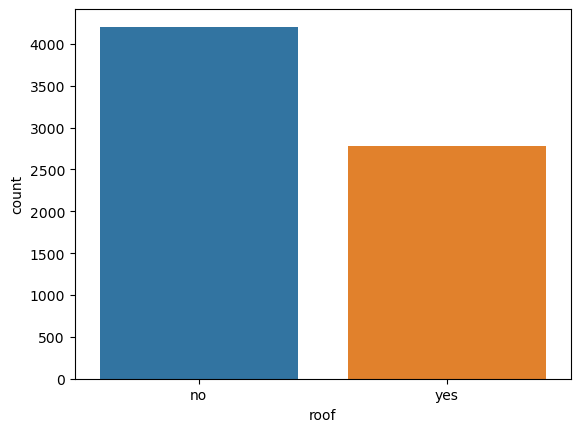

In [37]:
sns.countplot(train['roof'])
plt.show()

Inference
1) As we see according to the data House with no roof has more counts

### Correlation

In [38]:
num_cols = train.dtypes[train.dtypes!='object'].index
print(num_cols)

Index(['id', 'Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB'],
      dtype='object')


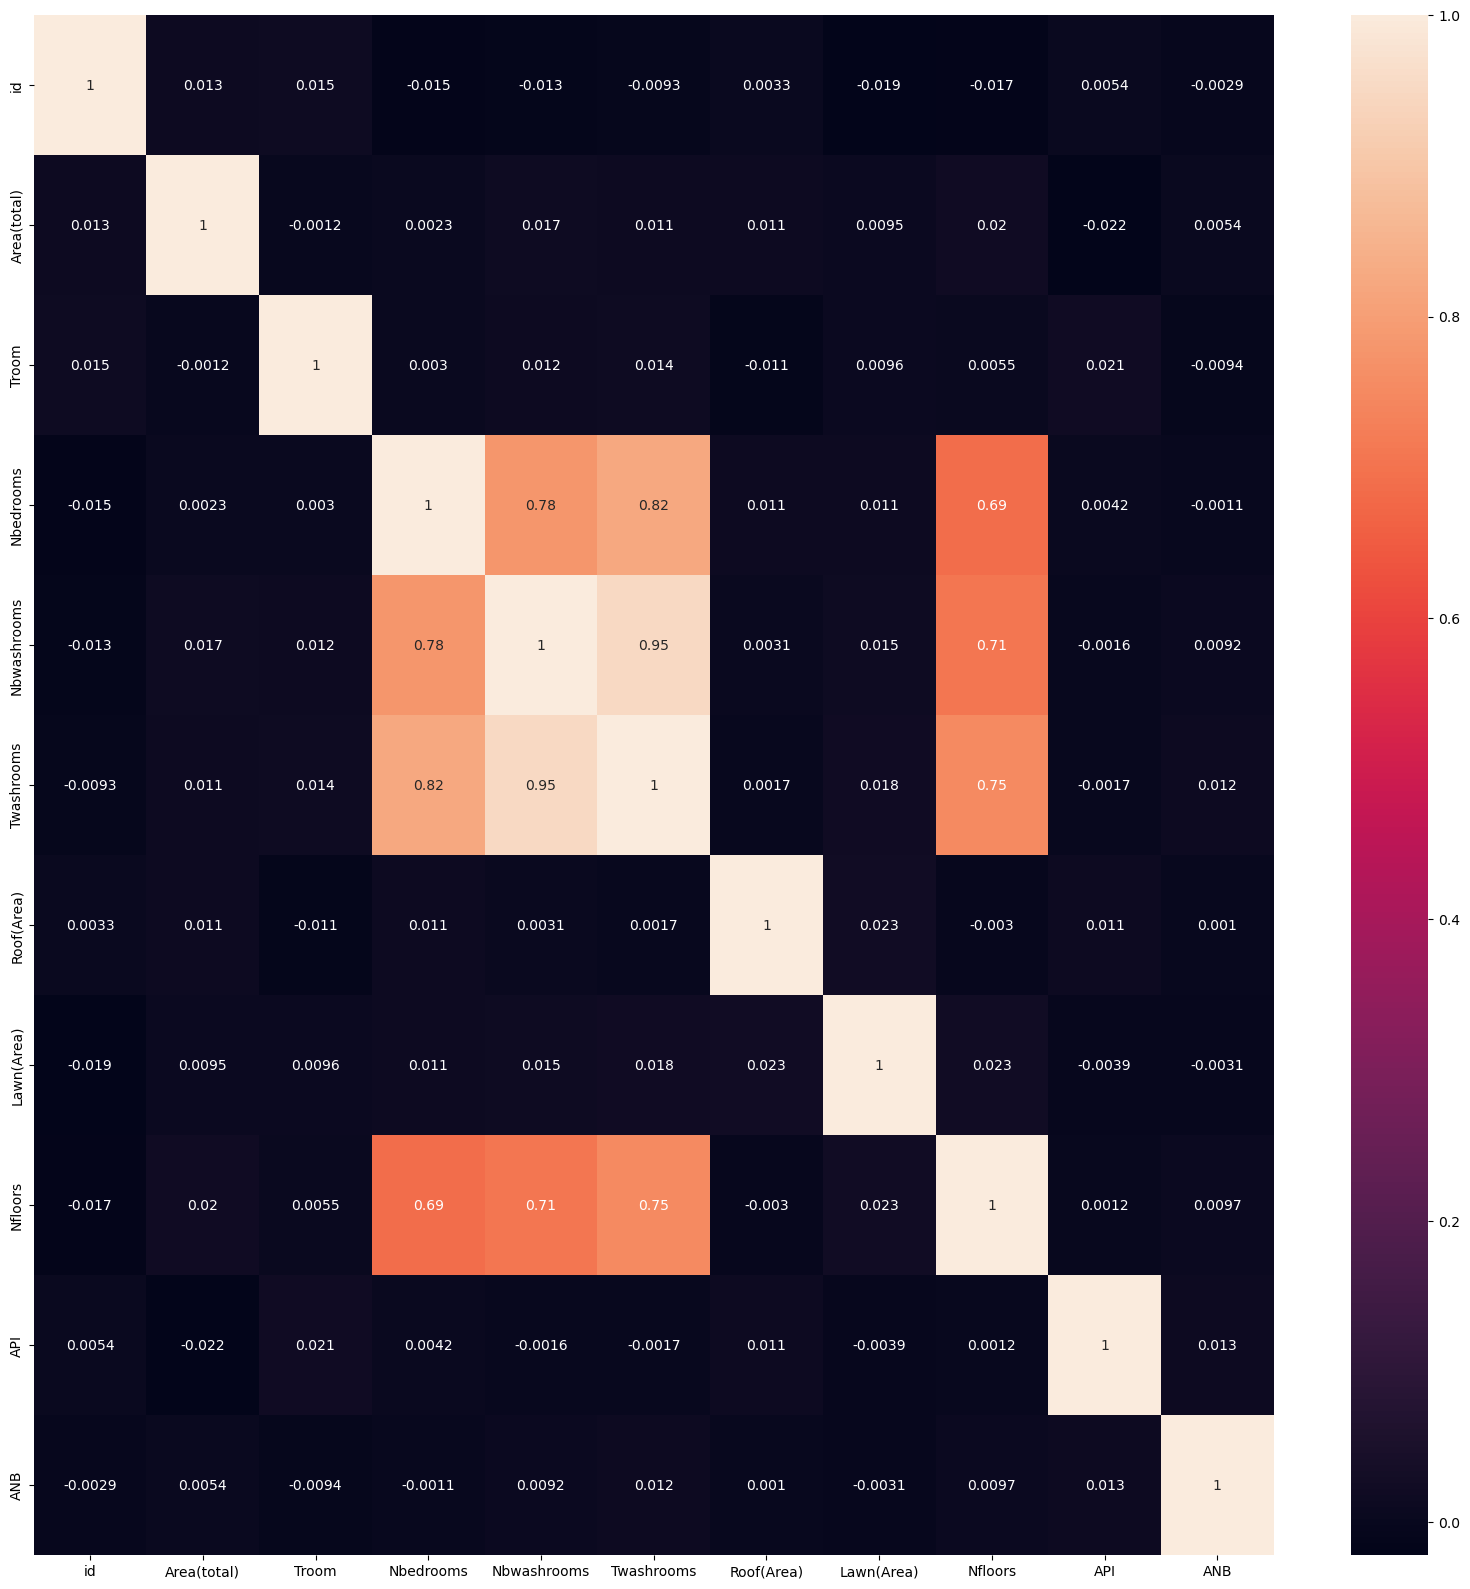

In [39]:
corr = train[num_cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

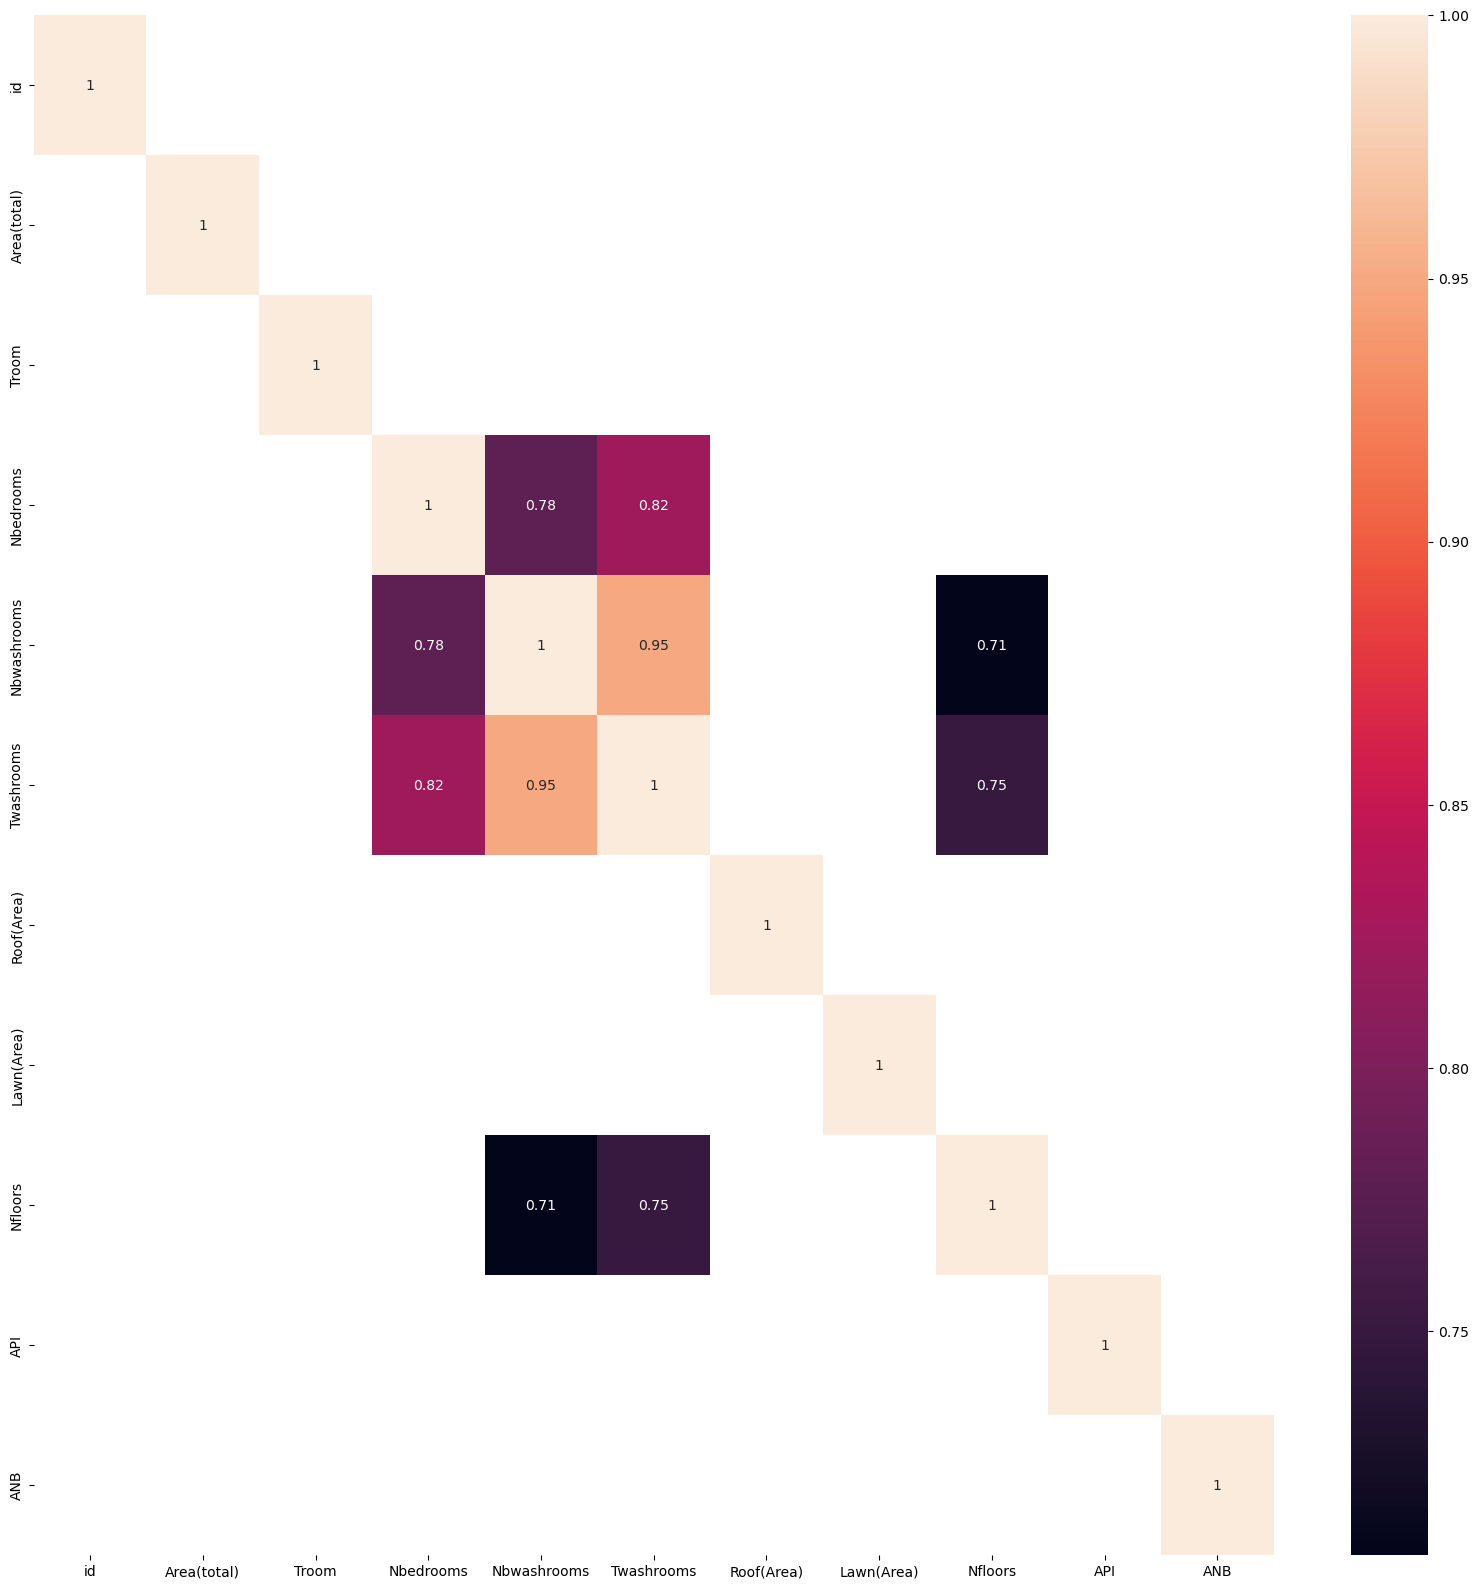

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],annot=True)
plt.show()

### Inference
1) According to the data Nbedrooms and Nbwashrooms are highly correlated <br>
2) Twashrooms and Nbedrooms are highly correlated <br>
3) Twashrooms and Nbwashrooms are highly correlated <br>
4) NFloors and Twashrooms are highly correlated <br>
5) NFloors and Nbwashrooms are highly correlated <br>

### Outlier Treatment

In [41]:
train.drop('id',axis=1,inplace=True)

In [42]:
train.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
Area(total),6989.0,325.223065,20.547846,290.0,290.0,291.0,292.0,293.0,326.0,357.0,358.0,358.0,359.0,360.0,360.0
Troom,6989.0,7.012448,1.420066,5.0,5.0,5.0,5.0,5.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0
Nbedrooms,6989.0,4.992417,1.653542,2.0,2.0,2.0,2.0,2.0,5.0,8.0,8.0,8.0,8.0,8.0,8.0
Nbwashrooms,6989.0,4.004865,1.597071,1.0,1.0,1.0,1.0,1.0,4.0,7.0,7.0,7.0,7.0,7.0,7.0
Twashrooms,6989.0,5.501789,1.509142,3.0,3.0,3.0,3.0,3.0,5.0,8.0,8.0,8.0,8.0,8.0,8.0
Roof(Area),6989.0,38.044642,47.628034,0.0,0.0,0.0,0.0,0.0,0.0,114.0,115.0,117.0,118.0,119.0,120.0
Lawn(Area),6989.0,89.963514,11.812621,70.0,70.0,70.0,71.0,71.0,90.0,108.0,109.0,109.0,110.0,110.0,110.0
Nfloors,6989.0,4.510087,1.831424,1.0,1.0,1.0,1.0,1.0,5.0,8.0,8.0,8.0,8.0,8.0,8.0
API,6989.0,78.972814,11.850920,59.0,59.0,59.0,60.0,61.0,79.0,97.0,98.0,98.0,99.0,99.0,99.0
ANB,6989.0,3.494778,1.700662,1.0,1.0,1.0,1.0,1.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0


### There are no outliers in the data

In [43]:
train.info()         # As we can see Expected is in string form so we have to change this in int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6989 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  6989 non-null   int64  
 1   Troom        6989 non-null   float64
 2   Nbedrooms    6989 non-null   float64
 3   Nbwashrooms  6989 non-null   float64
 4   Twashrooms   6989 non-null   float64
 5   roof         6989 non-null   object 
 6   Roof(Area)   6989 non-null   float64
 7   Lawn(Area)   6989 non-null   float64
 8   Nfloors      6989 non-null   int64  
 9   API          6989 non-null   float64
 10  ANB          6989 non-null   int64  
 11  Grade        6989 non-null   object 
 12  EXPECTED     6989 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 764.4+ KB


### Changing datatype of Expected in both train and test

In [44]:
train['EXPECTED'] = train['EXPECTED'].str[:-1]   # removing dollars from expected

In [45]:
train['EXPECTED'] = train['EXPECTED'].astype(int)   # converting string into int

In [46]:
train['Grade'].value_counts()     

C    2923
D    2126
B    1472
A     442
E      26
Name: Grade, dtype: int64

In [47]:
# Do label encoding with replace of target variable

# train['Grade'] = train['Grade'].replace('A', 1)
# train['Grade'] = train['Grade'].replace('B', 2)
# train['Grade'] = train['Grade'].replace('C', 3)
# train['Grade'] = train['Grade'].replace('D', 4)
# train['Grade'] = train['Grade'].replace('E', 5)


In [48]:
train['Grade'].value_counts()

C    2923
D    2126
B    1472
A     442
E      26
Name: Grade, dtype: int64

In [49]:
train['roof'].value_counts()

no     4204
yes    2785
Name: roof, dtype: int64

In [50]:
train['roof'] = train['roof'].replace('no', 0)    # 0 - no ,1- yes
train['roof'] = train['roof'].replace('yes', 1)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3299 non-null   float64
 3   Nbedrooms    3299 non-null   float64
 4   Nbwashrooms  3299 non-null   float64
 5   Twashrooms   3299 non-null   int64  
 6   roof         3299 non-null   object 
 7   Roof(Area)   3299 non-null   float64
 8   Lawn(Area)   3299 non-null   float64
 9   Nfloors      3299 non-null   int64  
 10  API          3299 non-null   float64
 11  ANB          3299 non-null   int64  
 12  EXPECTED     3299 non-null   object 
dtypes: float64(6), int64(5), object(2)
memory usage: 335.2+ KB


In [52]:
test['EXPECTED'] = test['EXPECTED'].str[:-1] 
test['EXPECTED'] = test['EXPECTED'].astype(int)

In [53]:
test['roof'].value_counts()     # perform label encoding for test data

no     1993
yes    1306
Name: roof, dtype: int64

In [54]:
test['roof'] = test['roof'].replace('no', 0)    # 0 - no ,1- yes
test['roof'] = test['roof'].replace('yes', 1)

In [55]:
test['roof'].value_counts()

0    1993
1    1306
Name: roof, dtype: int64

### Selecting x and y

In [56]:
x = train.drop(['Grade'],axis=1)
y = train['Grade']
print(x.shape)
print(y.shape)

(6989, 12)
(6989,)


In [57]:
x.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'EXPECTED'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split 

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4892, 12)
(2097, 12)
(4892,)
(2097,)


In [60]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Decision Tree Classifier

In [62]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=15)
dt_res = eval_model(dt,x_train,y_train,x_test,y_test,'DTree')
dt_res

Confusion_Matrix
 [[ 96  38   0   0   0]
 [ 39 323  76   0   0]
 [  2 108 704  90   0]
 [  0   0  97 512   1]
 [  0   0   0   7   4]]
Classification Report
               precision    recall  f1-score   support

           A       0.70      0.72      0.71       134
           B       0.69      0.74      0.71       438
           C       0.80      0.78      0.79       904
           D       0.84      0.84      0.84       610
           E       0.80      0.36      0.50        11

    accuracy                           0.78      2097
   macro avg       0.77      0.69      0.71      2097
weighted avg       0.78      0.78      0.78      2097



,Train_Acc,Test_Acc
DTree,0.910875,0.781593


#### Inference -  As we can see it it highly overfitting

### Random Forest Classifier

In [63]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
rf_res = eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
rf_res

Confusion_Matrix
 [[ 99  35   0   0   0]
 [  9 355  74   0   0]
 [  0  52 789  63   0]
 [  0   0  62 548   0]
 [  0   0   0  10   1]]
Classification Report
               precision    recall  f1-score   support

           A       0.92      0.74      0.82       134
           B       0.80      0.81      0.81       438
           C       0.85      0.87      0.86       904
           D       0.88      0.90      0.89       610
           E       1.00      0.09      0.17        11

    accuracy                           0.85      2097
   macro avg       0.89      0.68      0.71      2097
weighted avg       0.86      0.85      0.85      2097



,Train_Acc,Test_Acc
Random Forest,0.934587,0.854554


#### Inference- It is highly overfit

### Adaboost Classifier

In [64]:
ada = AdaBoostClassifier(n_estimators=70)  # depth of tree = 1
ada_res = eval_model(ada,x_train,y_train,x_test,y_test,'AdaBoost')
ada_res

Confusion_Matrix
 [[130   0   4   0   0]
 [225   0 203  10   0]
 [ 69   0 409 426   0]
 [  0   0  43 567   0]
 [  0   0   0  11   0]]
Classification Report
               precision    recall  f1-score   support

           A       0.31      0.97      0.47       134
           B       0.00      0.00      0.00       438
           C       0.62      0.45      0.52       904
           D       0.56      0.93      0.70       610
           E       0.00      0.00      0.00        11

    accuracy                           0.53      2097
   macro avg       0.30      0.47      0.34      2097
weighted avg       0.45      0.53      0.46      2097



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Train_Acc,Test_Acc
AdaBoost,0.54211,0.52742


#### Inference - There is a minimul Overfitting but we have less accuracy 

### Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier(n_estimators=150,learning_rate=0.05,
                                 random_state=8,max_features=12)
                                 
gbc_res = eval_model(gbc,x_train,y_train,x_test,y_test,'Gradient Boost')
gbc_res  

Confusion_Matrix
 [[102  32   0   0   0]
 [  8 361  69   0   0]
 [  0  53 804  47   0]
 [  0   0  51 559   0]
 [  0   0   0   9   2]]
Classification Report
               precision    recall  f1-score   support

           A       0.93      0.76      0.84       134
           B       0.81      0.82      0.82       438
           C       0.87      0.89      0.88       904
           D       0.91      0.92      0.91       610
           E       1.00      0.18      0.31        11

    accuracy                           0.87      2097
   macro avg       0.90      0.71      0.75      2097
weighted avg       0.87      0.87      0.87      2097



,Train_Acc,Test_Acc
Gradient Boost,0.907809,0.871722


In [80]:
from xgboost import XGBClassifier

In [77]:
from collections import Counter
Counter(y_train)

Counter({'D': 1516, 'C': 2019, 'B': 1034, 'E': 15, 'A': 308})

In [82]:
y_train1 = y_train.replace({'A':0,'B':1,'C':2,'D':3,'E':4})
y_test1 = y_test.replace({'A':0,'B':1,'C':2,'D':3,'E':4})

In [84]:
xgb = XGBClassifier(objective='multi:softmax',eval_metric ='mlogloss')
xgb.fit(x_train,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

#### Inference - As we can see there is minimul overfitting with a great accuracy

### Concating all results

In [69]:
all_res = pd.concat([dt_res,rf_res,ada_res,gbc_res])
all_res

,Train_Acc,Test_Acc
DTree,0.910875,0.781593
Random Forest,0.934587,0.854554
AdaBoost,0.542110,0.527420
Gradient Boost,0.907809,0.871722


### According to the result Gradient Boost is the best model as there is minimul overfitting + has highest accuracy comparing to all others models

### Hyperparameter tuning of the best model which is Gradient Boost

In [154]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [155]:
params_rf = {'n_estimators':[100,200,300,350,400],
            'learning_rate':[0.05,0.06,0.07,0.08,0.09],
            'max_features':[6,7,8,9,10,11,12]}

In [156]:
gbc1 = GradientBoostingClassifier(random_state=8)
gbc_res1 = RandomizedSearchCV(estimator=gbc1,param_distributions= params_rf,scoring='accuracy',cv=5)
gbc_res1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=8),
                   param_distributions={'learning_rate': [0.05, 0.06, 0.07,
                                                          0.08, 0.09],
                                        'max_features': [6, 7, 8, 9, 10, 11,
                                                         12],
                                        'n_estimators': [100, 200, 300, 350,
                                                         400]},
                   scoring='accuracy')

In [157]:
print(gbc_res1.best_estimator_)
print(gbc_res1.best_params_)
print(gbc_res1.best_score_)

GradientBoostingClassifier(learning_rate=0.06, max_features=8, n_estimators=400,
                           random_state=8)
{'n_estimators': 400, 'max_features': 8, 'learning_rate': 0.06}
0.8816452245624369


In [158]:
gb2 = GradientBoostingClassifier(**gbc_res1.best_params_)
gb2.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.06, max_features=8, n_estimators=400)

In [159]:
gbc_res1 = eval_model(gb2,x_train,y_train,x_test,y_test,'Gradient Boost1')
gbc_res1

Confusion_Matrix
 [[111  23   0   0   0]
 [ 10 378  50   0   0]
 [  0  41 816  47   0]
 [  0   0  52 558   0]
 [  0   0   0   8   3]]
Classification Report
               precision    recall  f1-score   support

           1       0.92      0.83      0.87       134
           2       0.86      0.86      0.86       438
           3       0.89      0.90      0.90       904
           4       0.91      0.91      0.91       610
           5       1.00      0.27      0.43        11

    accuracy                           0.89      2097
   macro avg       0.91      0.76      0.79      2097
weighted avg       0.89      0.89      0.89      2097



,Train_Acc,Test_Acc
Gradient Boost1,0.96852,0.889843


In [160]:
all_res = pd.concat([dt_res,rf_res,ada_res,gbc_res,gbc_res1])
all_res

,Train_Acc,Test_Acc
DTree,0.911079,0.780639
Random Forest,0.937040,0.854077
AdaBoost,0.542110,0.527420
Gradient Boost,0.907809,0.871722
Gradient Boost1,0.968520,0.889843


### According to result gradient boost is best model

## Final Model

In [70]:
gb_final = GradientBoostingClassifier(n_estimators=150,learning_rate=0.05,
                                 random_state=8,max_features=12)
gb_final.fit(x,y)

GradientBoostingClassifier(learning_rate=0.05, max_features=12,
                           n_estimators=150, random_state=8)

In [71]:
test.shape

(3299, 13)

In [72]:
test_data_4_prediction = test[x.columns]
print(test_data_4_prediction.shape)

(3299, 12)


In [73]:
ypred_test = gb_final.predict(test_data_4_prediction)

In [74]:
train.shape

(6989, 13)

In [75]:
test.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,0,0.0,84.0,5,91.0,6,4422
1,2,311,6.0,5.0,5.0,6,0,0.0,86.0,6,83.0,4,3432
2,3,342,5.0,6.0,6.0,7,1,120.0,85.0,4,95.0,5,4066
3,4,329,7.0,7.0,4.0,6,0,0.0,105.0,5,97.0,6,4322
4,5,307,6.0,2.0,3.0,4,0,0.0,76.0,2,64.0,4,3031


In [167]:
submission = pd.DataFrame({'ID':test['id'],'Grade':ypred_test})
submission.head(10)

,ID,Grade
0,1,2
1,2,4
2,3,3
3,4,3
4,5,4
5,6,3
6,7,2
7,8,3
8,9,4
9,10,4


In [4]:
lables = {1:'A',2:'B',3:'C',4:'D',5:'E'}

In [ ]:
submisson['Grade_New'] = submisson['Grade'].map(labels)

In [168]:
submission.to_csv('result.csv',index=False)

### This is how we can use machine learning algorithms to do House Grade Predictions